# Historical climate changes 

In this excercise we will investigate how climate on Earth has changed in the past from 1750 till today.

We will use a simple climate model (twobox) to explore the relative impact of natural and man-made climate forcing.

### Change to the correct directory

First make sure you are in the correct directory 

e.g. cd ~/Document/GitHub/twobox

In [45]:
cd ~/Documents/GitHub/twobox/

/Users/kerim/Documents/GitHub/twobox


In [46]:
pwd

'/Users/kerim/Documents/GitHub/twobox'

# Introduction to the twobox climate model

The twobox model is a simple climate model simulating the impact of radiative forcing on the Earth's energy balance, including the impact of greenhouse gases, volcanic activity and changes in solar radiation.

The model consists of two boxes; one representing the top ocean mixed layer and one box for the deeper ocean.

<img src="images/2D_model_schematic.png">

There is a balance between the radiation entering and leaving the top of the atmosphere (TOA). This is represented by the flux of energy between the atmosphere and the ocean mixed layer ocean ($\Delta Q$).  The model also accounts for the fluxes of energy entering the deeper ocean ($\gamma$).

The computation of the changes in temperature in the twobox climate model is based on the radiative balance as follows (and included in the Python file `twoboks.py`):

$$\begin{align}
c_{mix}\dfrac{d\Delta T_s}{dt}&=\Delta Q-\lambda \Delta T_s -\gamma (\Delta T_s -\Delta T_0)     \qquad   (\mathit{1}) \\
c_{deep}\dfrac{d\Delta T_o}{dt}&=\gamma (\Delta T_s - \Delta T_o)  \qquad   (\mathit{2}) 
\end{align}$$

where $c_{mix}$ and $c_{deep}$ is the heat capacity of the ocean mixed layer and deeper ocean, respectively. $\Delta T_s$ gives the changes in surface temperature, while $\Delta T_o$ gives the temperature in the deeper ocean. $\lambda$ represents the *climate feedbaks*, and $\gamma$ represents the heat uptake by the deeper ocean.

In [47]:
# Import relevant python packages
import pandas as pd
import matplotlib.pyplot as plt

# Include this line if you want to open this file in Jupyter Notebook to make interactive plots
%matplotlib inline 

# Imports the function calculating the temperature changes 
from twoboks import calculate_temp_anomalies 

## Setting up the twobox model
To apply the twobox model we must first load the radiative forcing data and calculate the total radiative forcing ($\Delta$Q). Next we must decide which *climate feedbacks* ($\lambda$) to include, and specify the strength of the *heat uptake by the deeper ocean* ($\gamma$).

### 1. Radiative forcing

Here we use historical data for the radiative forcing covering the period 1750 to 2011. The data are taken from the latest IPCC report (for more info see AR6 Chapter 7: https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_Chapter07.pdf)

We consider the following *radiative forcing*:

- greenhouse gases 
- solar radiation
- volcanism
- land use changes 
- aerosols (man-mande)

The total radiative forcing ($\Delta$Q) is given by:

$$\begin{align}
\Delta Q=\Delta Q_{drivhus} + \Delta Q_{sol} + \Delta Q_{vulkan} + \Delta Q_{arealbruk} + \Delta Q_{aerosoler} 
\end{align}$$


In [56]:
# read the historical forcing from the file 'historical_IPCC6.csv'
df=pd.read_csv('forcing_files/historical_IPCC6.csv',index_col = 0,sep=';',encoding = "utf-8")

# show the data
df

,Greenhouse gases,Solar radiation,Volcanism,Land-use change,Aerosols
Year,,,,,
1750,0.000,0.098,0.200,0.000,0.000
1751,0.002,0.079,0.200,0.000,0.005
1752,0.004,0.049,0.200,0.000,0.009
1753,0.006,0.013,0.200,-0.001,0.005
1754,0.008,-0.021,0.200,-0.001,-0.003
...,...,...,...,...,...
2015,3.139,0.029,0.110,-0.199,-1.117
2016,3.195,-0.008,0.127,-0.199,-1.087
2017,3.233,-0.017,0.151,-0.199,-1.063


### Plot de ulike strålingspådriv

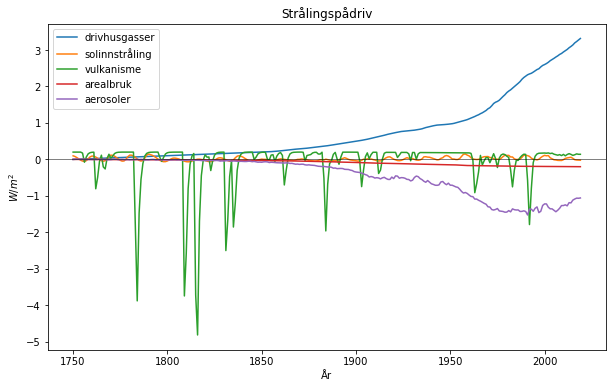

In [49]:
df.plot(title="Strålingspådriv",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)


## Spørgsmål - Del I

* Hvilke av de nevnte strålingspådriv er naturlige og hvilke er menneskeskapte?

* Hva er betydningen av et negativt (positivt) strålingspådriv?

* Hvordan tror du et negtativt (positivt) strålingspådriv påvirker overflatetemperaturen på Jorden?


### Finn samlet strålingspådriv
I koden under lages en ny variable i vor dataramme som inneholder det totale pådriv.

First - define switches for radiative forcing

In [4]:
switch_ghg=1     # Greenhouse gas forcing on=1 off=0
switch_solar=1   # Solar forcing on=1 off=0
switch_volc=1    # Volcanic forcing on=1 off=0
switch_land=1    # Landuse forcing on=1 off=0
switch_aero=1    # Pollution particle forcing on=1 off=0

<function matplotlib.pyplot.legend(*args, **kwargs)>

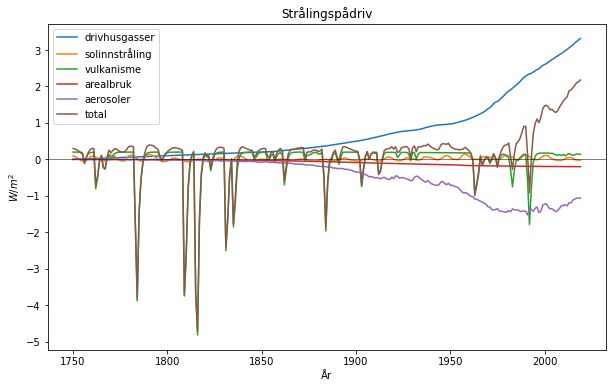

In [5]:
# Beregn og plot det totale strålingspådriv
df['total'] = switch_ghg*df['drivhusgasser']+switch_solar*df['solinnstråling']+switch_volc*df['vulkanisme']+switch_land*df['arealbruk']+switch_aero*df['aerosoler']

# plot
df.plot(title="Strålingspådriv",ylabel="$W/m^2$", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7)
plt.legend

## Spørgsmål - Del II

* Hvilken av de ulike faktorer har den største betydningen for det totale strålingspådrivet før år 1900?

* Er der en endring i hvilken faktor som er den viktigste etter år ca. 1900?

* Er der noen år/perioder som skiller sig særligt ut? Hvorfor?


### 2. Bestem tilbakekoblingsfaktorer (climate feedbacks)

Værdiene for de ulike tilbakekoblingsfaktorer er hentet fra *Soden and Held (2006)* og er basert på output fra 14 ulike klimamodeller som bidrar til IPCC rapporten. 

<img src="bilder/table_lambda_values.png" style="width:70%">


In [6]:
# CMIP5 values
lambda_planck=-3.21     # Stefan Boltzmann's 'feedback' [Wm-2K-1] best guesses  [-3.3 to -3.1]
lambda_lapse=-0.84      # Lapse rate feedback [Wm-2K-1] best guesses [-1.2 to -0.5]
lambda_water=1.8       # water vapor feedback [Wm-2K-1] best guesses [1.5 to 2.2]
lambda_cloud=0.69      # Clouds feedback [Wm-2K-1] best guesses [0.1 to 1.2]
lambda_albedo=0.26     # Surface albedo feedback [Wm-2K-1] best guesses [0.1 to 0.4]
lambda_other=0.0       # Other feedbacks [Wm-2K-1]

lambda_sum=sum([lambda_planck,
    lambda_lapse,
    lambda_water,
    lambda_cloud,
    lambda_albedo,
    lambda_other])

### 3. Bestem varmeoptakk til dybhavet

In [7]:
# Deep ocean heat uptake efficency [Wm-2K-1] fra Dufresne and Bony (2008).
gamma=-0.69  # best guesses [-1 to -0.5]

## Beregn temperaturendringer for perioden 1750-2011 med Toboksmodellen
Vi ønsker nå å beregne hvordan temperaturen endrer seg som resultat av strålingspådrivet, verdiene vi har satt for tilbakekoblingsmekanismer, og varmeutveksling til dybhavet. 

In [8]:
Ts, To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma) # kaller opp funksjonen som regner ut temperaturendringene

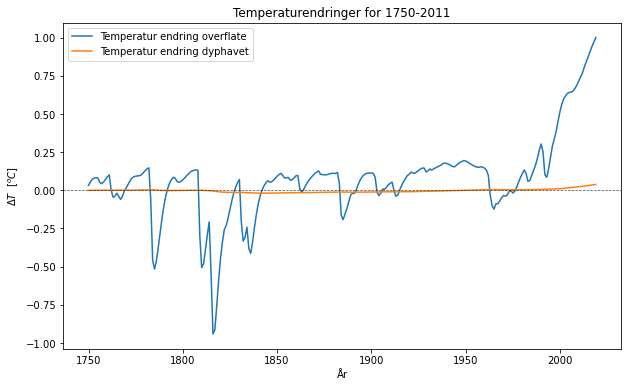

In [9]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet
temp['Temperatur endring overflate']=Ts
temp['Temperatur endring dyphavet']=To
temp.plot(ylabel="$\Delta T$  $[^oC]$", title="Temperaturendringer for 1750-2011", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

### Beregn temperaturendringen relativ til år 1750

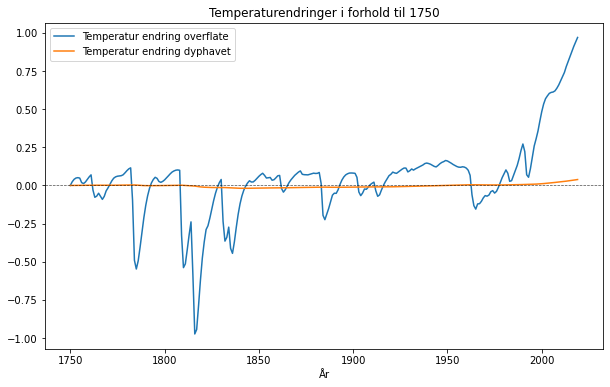

In [10]:
Tanom = temp - temp.loc[1750]
Tanom.plot( title="Temperaturendringer i forhold til 1750", figsize=(10,6))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

### Finn temperaturen for et bestemt år

In [11]:
# velg år
år = 2011

Tloc = Tanom.loc[år]
Tloc
print('Relativ temperaturendring (overflate) i år', år, ':', "%.2f" %(Tloc['Temperatur endring overflate']),'°C')

Relativ temperaturendring (overflate) i år 2011 : 0.71 °C


### Temperaturendringer oppdelt etter strålingspådriv 
Noen ganger så ønsker man bare å studere effektene av eksempelvis solens aktivitet. I koden under beregner vi temperaturendringene for hver av de ulike strålingspådriv.  

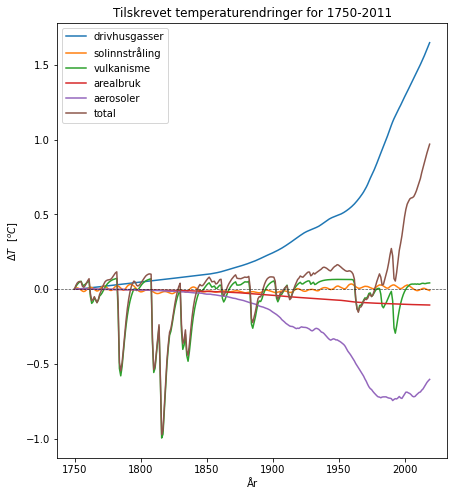

In [12]:
temp = pd.DataFrame(index=df.index) # vi lager en ny dataramme som har samme indexer (i.e. årstal) som pådrivet

temp['drivhusgasser'], To = calculate_temp_anomalies(df['drivhusgasser'].to_numpy(), lambda_sum, gamma)
temp['solinnstråling'], To = calculate_temp_anomalies(df['solinnstråling'].to_numpy(), lambda_sum, gamma)
temp['vulkanisme'], To = calculate_temp_anomalies(df['vulkanisme'].to_numpy(), lambda_sum, gamma)
temp['arealbruk'], To = calculate_temp_anomalies(df['arealbruk'].to_numpy(), lambda_sum, gamma)
temp['aerosoler'], To = calculate_temp_anomalies(df['aerosoler'].to_numpy(), lambda_sum, gamma)
temp['total'], To = calculate_temp_anomalies(df['total'].to_numpy(), lambda_sum, gamma)

# Beregn og plot endring ifht år 1750
Tanom1750 = temp - temp.loc[1750]

Tanom1750.plot(ylabel="$\Delta T$  $[^oC]$", title="Tilskrevet temperaturendringer for 1750-2011", figsize=(7,8))
plt.axhline(y=0, linewidth=0.7, color="black", alpha=0.7, linestyle='--')

## Spørgsmål - Del III

* Forklar hva du ser på plottet. 
    * Ka du si noe om endringene i overflatetemperaturen ($T_s$) gjennom perioden 1750-2011?
* Hvor mye har overflatetemperaturen (*Ts*) endret sig i forhold til år 1750? 

* Hva er den primære årsakken til denne endringen?



## Sammenlikne med obsevert temperaturendringer (EKSTRA???)

* Hvordan passer vores plot med det fra IPCC rapporten (AR6)?

Figuren under viser den obseverte samt simulert endring i global middelstemperatur hentet fra den seneste IPCC rapporten (AR6).  

<figure>
<img src="bilder/AR6_figSPM1b-600x528.png" >
<figcaption align = "center"> Source: AR6 Fig SPM1b</figcaption>
</figure>